# Test Image Processing (1165px x 655px pciture)

# Import Library

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Import Raw Photos

In [2]:
img = cv2.imread("../data/photos/raw/test_1.jpg")

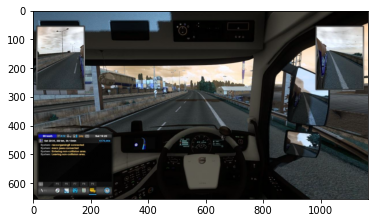

width:   1165
height:  655
channel: 3


In [3]:
plt.imshow(img)
plt.show()
IMAGE_H, IMAGE_W, IMAGE_CHANNELS = img.shape
print('width:  ', IMAGE_W)
print('height: ', IMAGE_H)
print('channel:', IMAGE_CHANNELS)

# Image Pre-Processing

## ROI Cropping

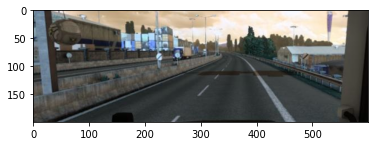

width:   600
height:  200
channel: 3


In [4]:
img_crop = img[200:400, 200:800] # Apply np slicing for ROI crop
plt.imshow(img_crop)
plt.show()

IMAGE_CROP_H, IMAGE_CROP_W, IMAGE_CROP_CHANNELS = img_crop.shape
print('width:  ', IMAGE_CROP_W)
print('height: ', IMAGE_CROP_H)
print('channel:', IMAGE_CROP_CHANNELS)

## Exposure Correction

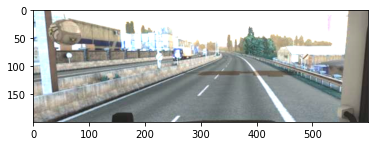

In [5]:
exp_cor = cv2.convertScaleAbs(img_crop, alpha=1.8, beta=30)
plt.imshow(exp_cor)
plt.show()

## Bird Eye View v1

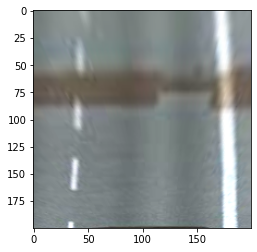

width:   200
height:  200
channel:  3


In [6]:
#Setting up the point for perspective
pts1 = np.float32([[200, IMAGE_CROP_H], [330, 100], [400, 100], [490, IMAGE_CROP_H]])
pts2 = np.float32([[0, 200], [0, 0], [200, 0], [200, 200]])
matrix = cv2.getPerspectiveTransform(pts1, pts2)

bird_eye = cv2.warpPerspective(exp_cor, matrix, (200,200))
plt.imshow(bird_eye)
plt.show()

IMAGE_BirdEye_H, IMAGE_BirdEye_W, IMAGE_BirdEye_CHANNELS = bird_eye.shape
print('width:  ', IMAGE_BirdEye_H)
print('height: ', IMAGE_BirdEye_W)
print('channel: ', IMAGE_BirdEye_CHANNELS)

## Bird Eye View v2

In [ ]:
# #Setting up the point for perspective
# pts1 = np.float32([[200, IMAGE_CROP_H], [330, 100], [400, 100], [490, IMAGE_CROP_H]])
# pts2 = np.float32([[0, 200], [0, 0], [200, 0], [200, 200]])
# matrix = cv2.getPerspectiveTransform(pts1, pts2)

# bird_eye = cv2.warpPerspective(exp_cor, matrix, (200,200))
# plt.imshow(bird_eye)
# plt.show()

# IMAGE_BirdEye_H, IMAGE_BirdEye_W, IMAGE_BirdEye_CHANNELS = bird_eye.shape
# print('width:  ', IMAGE_BirdEye_H)
# print('height: ', IMAGE_BirdEye_W)
# print('channel: ', IMAGE_BirdEye_CHANNELS)

## Gray Conversion

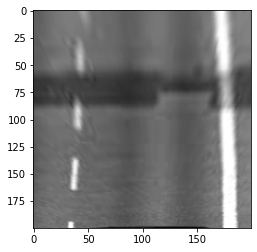

In [7]:
gray = cv2.cvtColor(bird_eye,cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")
plt.show()

## Black and White Conversion

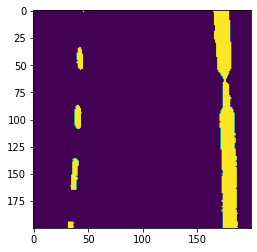

In [8]:
(thresh, im_bw) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(im_bw)
plt.show()

In [9]:
im_bw

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)